# Introduction

A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

# Data Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year

# Objective of this project

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_selection import RFECV
from scipy.stats import mode
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import label_binarize

C:\Users\Aman saini\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



### Importing Data

In [2]:
data=pd.read_csv("F:/r file/project/Adult Final project/adult_sal.csv")

In [3]:
data.head(2)

,Unnamed: 0,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
data.tail(2)

,Unnamed: 0,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
32559,32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,32561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


At the first glance of our dataset,we can see that blank values is in the form of "?" in "type_employer","occupation",
"country"

In [5]:
# As shown above column Unnamed:0 is not necessary .

data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
data.dtypes

age               int64
type_employer    object
fnlwgt            int64
education        object
education_num     int64
marital          object
occupation       object
relationship     object
race             object
sex              object
capital_gain      int64
capital_loss      int64
hr_per_week       int64
country          object
income           object
dtype: object

In [7]:
#Lets split data into contionous and catgorical .

cat=[x for x in data.columns if data[x].dtypes=="object"]

con=[x for x in data.columns if data[x].dtypes!="object"]

In [8]:
data[cat].head()

,type_employer,education,marital,occupation,relationship,race,sex,country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [9]:
data[con].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [10]:
data[con].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.describe(include=["O"])

,type_employer,education,marital,occupation,relationship,race,sex,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [12]:
data.apply(lambda x: len(x.unique()))

age                 73
type_employer        9
fnlwgt           21648
education           16
education_num       16
marital              7
occupation          15
relationship         6
race                 5
sex                  2
capital_gain       119
capital_loss        92
hr_per_week         94
country             42
income               2
dtype: int64

In [13]:
#Check the freequency of each catgorical columns
for i in cat:
    print('\n The freequency of %s'%i)
    print(data[i].value_counts())


 The freequency of type_employer
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: type_employer, dtype: int64

 The freequency of education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

 The freequency of marital
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital, dtype: int64

 The freeque

As seen above in marital column have values like 'Never-married','Divorced','Separated','Widowed' can be also called 'Single'
and 'Married-civ-spouse','Married-spouse-absent','Married-AF-spouse' can be 'Married'

In [14]:
data.shape

(32561, 15)

This shows that we have 32561 rows and 15 column in our dataset including target attribute(income).

## Data Cleaning

### Missing values

Missing values are represented by “?” in this dataset. Let’s check how many of those question marks each column has.

In [15]:
for col in data.columns:
    print('Column:',col,",Missing value:",data.loc[data[col]=="?"].size)

C:\Users\Aman saini\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Column: age ,Missing value: 0
Column: type_employer ,Missing value: 27540
Column: fnlwgt ,Missing value: 0
Column: education ,Missing value: 0
Column: education_num ,Missing value: 0
Column: marital ,Missing value: 0
Column: occupation ,Missing value: 27645
Column: relationship ,Missing value: 0
Column: race ,Missing value: 0
Column: sex ,Missing value: 0
Column: capital_gain ,Missing value: 0
Column: capital_loss ,Missing value: 0
Column: hr_per_week ,Missing value: 0
Column: country ,Missing value: 8745
Column: income ,Missing value: 0


Okay, so we have our result.There are three columns  "type_employer","occupation", "country" which consist "?" values.

In [16]:
#Lets replce the ? with NAN
replace_attribute=["type_employer","occupation", "country"]
for i in replace_attribute:
    data[i]=data[i].replace(['?'],np.nan)

In [17]:
data.isnull().sum()

age                 0
type_employer    1836
fnlwgt              0
education           0
education_num       0
marital             0
occupation       1843
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hr_per_week         0
country           583
income              0
dtype: int64

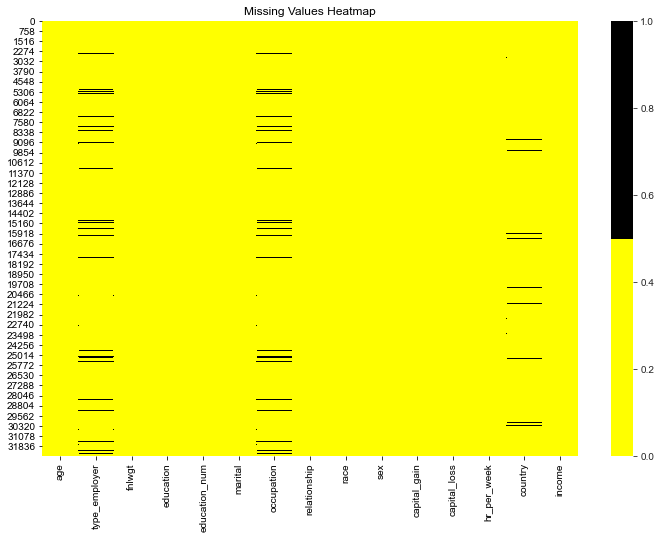

In [18]:
cols = data.columns 
colours = ['yellow', 'black'] 
f, ax = plt.subplots(figsize = (12,8))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours));

In [19]:
# Lets check the null attribute percentage

Missing_data=data.isnull().sum().sort_values(ascending=False)
percentage_missing_data=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
info=pd.concat([Missing_data,percentage_missing_data],axis=1,keys=['Missing value count','Missing_percentage'])
info.head(3)

,Missing value count,Missing_percentage
occupation,1843,0.056601
type_employer,1836,0.056386
country,583,0.017905


As seen above, the count of missing value in 'occupation ' and 'type_employer' seems to be preety much close.That cannot be a coincidence,Lets explour futher.

In [20]:
temp_df=data.loc[((data['occupation'].isnull())&(data['type_employer'].isnull())),:]
temp_df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


In [21]:
len(temp_df)

1836

Since the intersection of data points with missing occupation and missing workclass is the same as the number of data points with missing workclass, we know that where ever occupation is missing, workclass is too.

### Dealing with Missing Value

#### Method 1: Boolean Column

In [22]:
#type_employer
df_extracol=data.copy()
df_extracol.loc[df_extracol['type_employer'].isnull(),'type_employer.missing']=1
df_extracol.loc[df_extracol['type_employer'].notnull(),'type_employer.missing']=0

####################################

#occupation

df_extracol.loc[df_extracol['occupation'].isnull(),'occupation.missing']=1
df_extracol.loc[df_extracol['occupation'].notnull(),'occupation.missing']=0

In [23]:
df_extracol.head(29)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income,type_employer.missing,occupation.missing
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0.0,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0.0,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0.0,0.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0.0,0.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0.0,0.0


As per the above code ,we make the seperate column for missing occupation (occpation.missing) marked with 1 if value is NAN else 0.
This would help machine learning model to learn when the value is missing and would lead to assign lesser weight to the missing column
while predicting (e.g. when there is a 1 in the “occupation.missing” column, the machine learning algorithm would give less weight to the corresponding occupation column).
Same for "type_employer".

#### Method 2 : Mode Imputation

In [24]:
df_extracol.loc[((df_extracol['occupation.missing']==1)&(df_extracol['type_employer.missing']==0)),:]

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income,type_employer.missing,occupation.missing
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K,0.0,1.0
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K,0.0,1.0
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K,0.0,1.0
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K,0.0,1.0
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K,0.0,1.0
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K,0.0,1.0
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K,0.0,1.0


Lets create new catgory name 'Never-worked' in occupation column where 'type_employer' is 'Never-worked' and occupation is NAN

In [25]:
df_extracol.loc[((df_extracol['occupation.missing']==1)&(df_extracol['type_employer.missing']==0)),'occupation']='Never-worked'
#Now replace the rest with the mode its column
for col in ['type_employer','occupation','country']:
    df_extracol.fillna(df_extracol[col].mode()[0],inplace=True)

In [26]:
df_extracol.isnull().sum()

age                      0
type_employer            0
fnlwgt                   0
education                0
education_num            0
marital                  0
occupation               0
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hr_per_week              0
country                  0
income                   0
type_employer.missing    0
occupation.missing       0
dtype: int64

In [27]:
#Changing the datatype 'type_employer.missing' & 'occupation.missing'
df_extracol['type_employer.missing']=df_extracol['type_employer.missing'].astype(str)
df_extracol['occupation.missing']=df_extracol['occupation.missing'].astype(str)

## Exploratory Data Analysis

In [28]:
#Creating dictonary that contain the education and it's corresponding education number

edu_level={}
for x,y in df_extracol[['education_num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y]=x

### Education vs Income

Text(0, 0.5, 'Propertion of population')

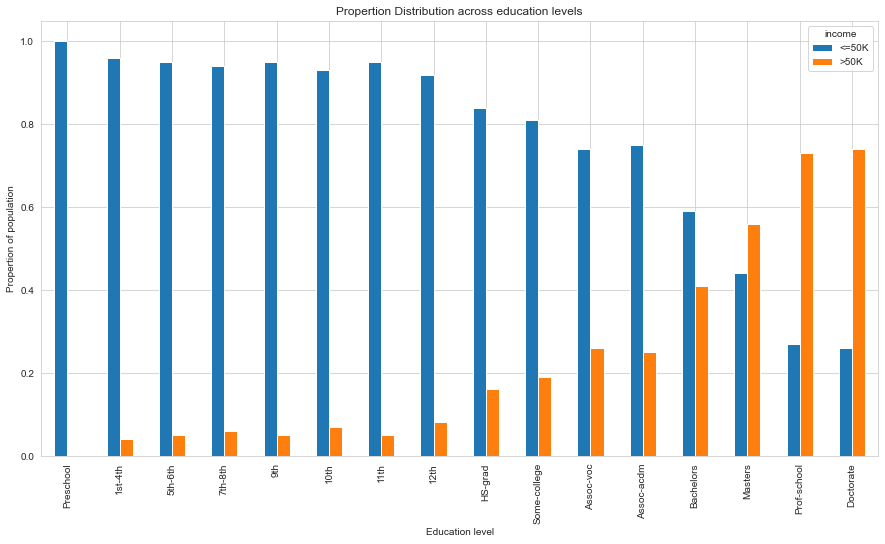

In [29]:
education=round(pd.crosstab(df_extracol.education,df_extracol.income))
education=round(pd.crosstab(df_extracol.education,df_extracol.income).div
                (pd.crosstab(df_extracol.education,df_extracol.income).apply(sum,1),0),2)
education=education.reindex(sorted(edu_level,key=edu_level.get,reverse=False))

ax=education.plot(kind='bar',title='Propertion Distribution across education levels',figsize=(15,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Propertion of population')

As seen from the above bar graph that education level increases, the propertion of people who are earning more than 50k a year is also increases.

### Gender vs Income

Text(0, 0.5, 'Propertion of population')

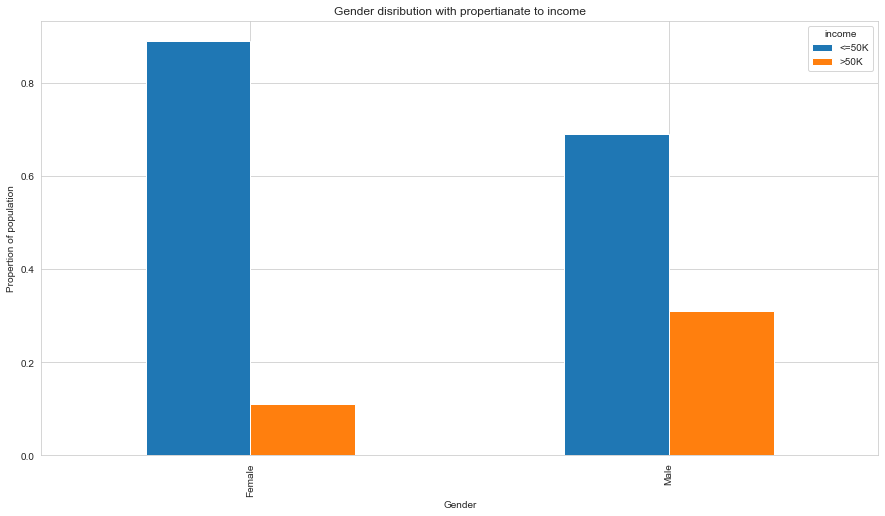

In [30]:
gender=round(pd.crosstab(df_extracol.sex,df_extracol.income).div(
    pd.crosstab(df_extracol.sex,df_extracol.income).apply(sum,1),0),2)
gender.sort_values(by='>50K',inplace=True)
ax=gender.plot(kind='bar',title='Gender disribution with propertianate to income',figsize=(15,8))
ax.set_xlabel('Gender')
ax.set_ylabel('Propertion of population')

As seen from the above bar graph, there exist a wage gap between females and males in term of feamle counterpart.

### Employer_type vs Income

Text(0, 0.5, 'Propertion of population')

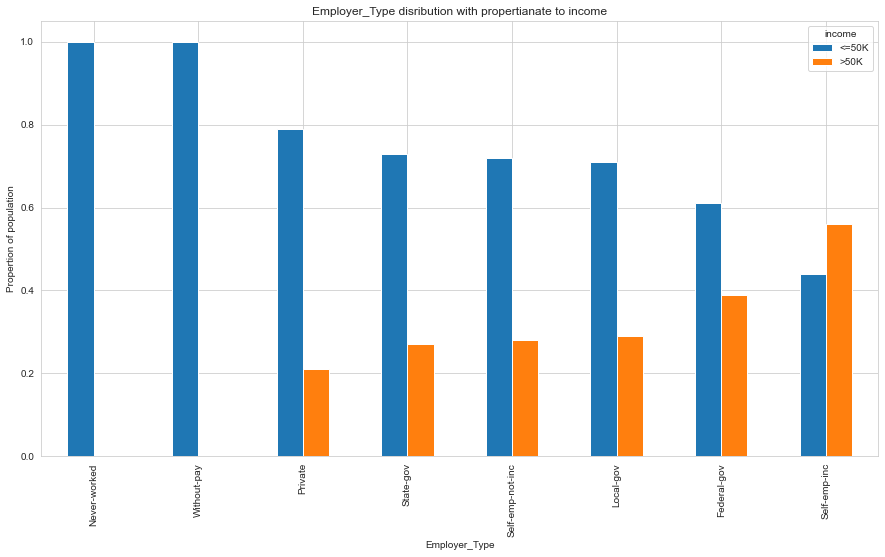

In [31]:
gender=round(pd.crosstab(df_extracol.type_employer,df_extracol.income).div(
    pd.crosstab(df_extracol.type_employer,df_extracol.income).apply(sum,1),0),2)
gender.sort_values(by='>50K',inplace=True)
ax=gender.plot(kind='bar',title='Employer_Type disribution with propertianate to income',figsize=(15,8))
ax.set_xlabel('Employer_Type')
ax.set_ylabel('Propertion of population')

Seems like private company never pay much as compared to govt sector.

### Occupation vs Income

Text(0, 0.5, 'Propertion of population')

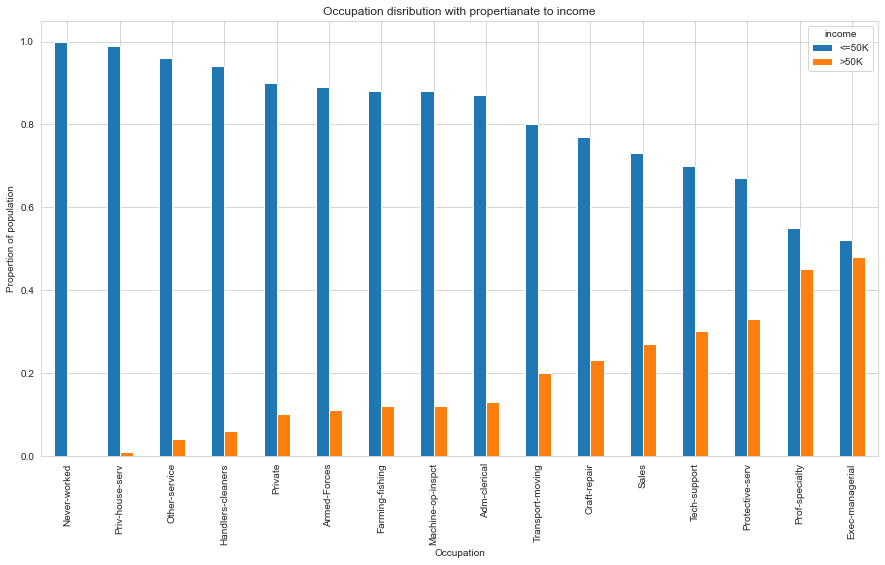

In [32]:
occupation=round(pd.crosstab(df_extracol.occupation,df_extracol.income).div(
    pd.crosstab(df_extracol.occupation,df_extracol.income).apply(sum,1),0),2)
occupation.sort_values(by='>50K',inplace=True)
ax=occupation.plot(kind='bar',title='Occupation disribution with propertianate to income',figsize=(15,8))
ax.set_xlabel('Occupation')
ax.set_ylabel('Propertion of population')

### Race vs Imcome

Text(0, 0.5, 'Propertion of population')

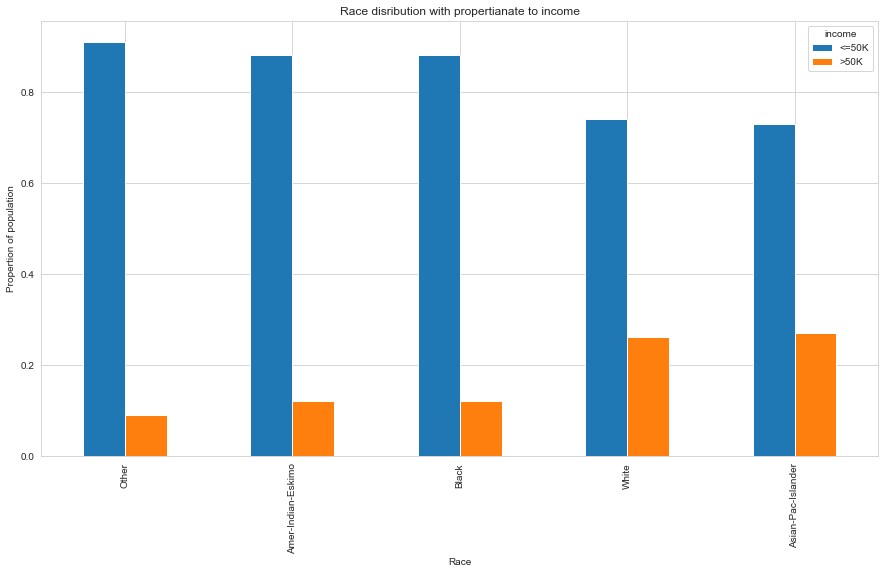

In [33]:
race=round(pd.crosstab(df_extracol.race,df_extracol.income).div(
    pd.crosstab(df_extracol.race,df_extracol.income).apply(sum,1),0),2)
race.sort_values(by='>50K',inplace=True)
ax=race.plot(kind='bar',title='Race disribution with propertianate to income',figsize=(15,8))
ax.set_xlabel('Race')
ax.set_ylabel('Propertion of population')

### Relationship vs Income 

Text(0, 0.5, 'Propertion of population')

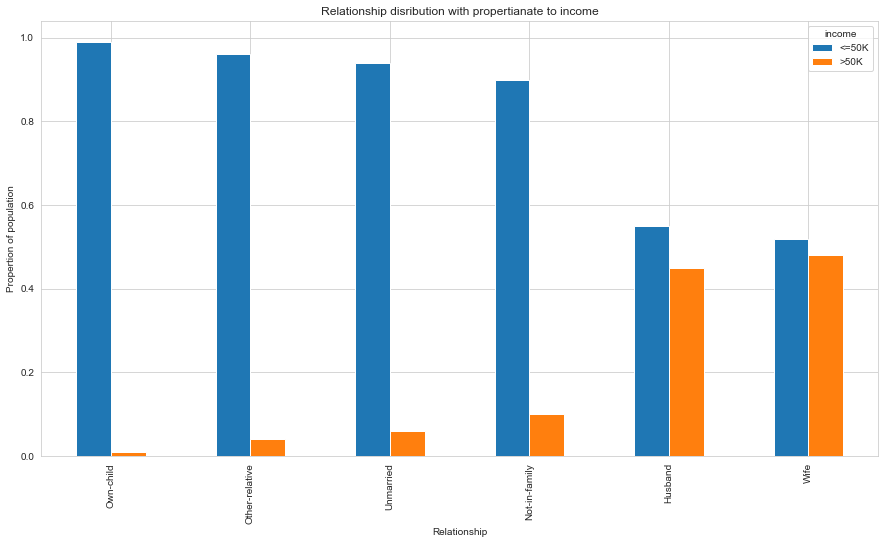

In [34]:
relationship=round(pd.crosstab(df_extracol.relationship,df_extracol.income).div(
    pd.crosstab(df_extracol.relationship,df_extracol.income).apply(sum,1),0),2)
relationship.sort_values(by='>50K',inplace=True)
ax=relationship.plot(kind='bar',title='Relationship disribution with propertianate to income',figsize=(15,8))
ax.set_xlabel('Relationship')
ax.set_ylabel('Propertion of population')

### Hour-Per-Weak vs Income 

Text(0, 0.5, 'Propertion of population')

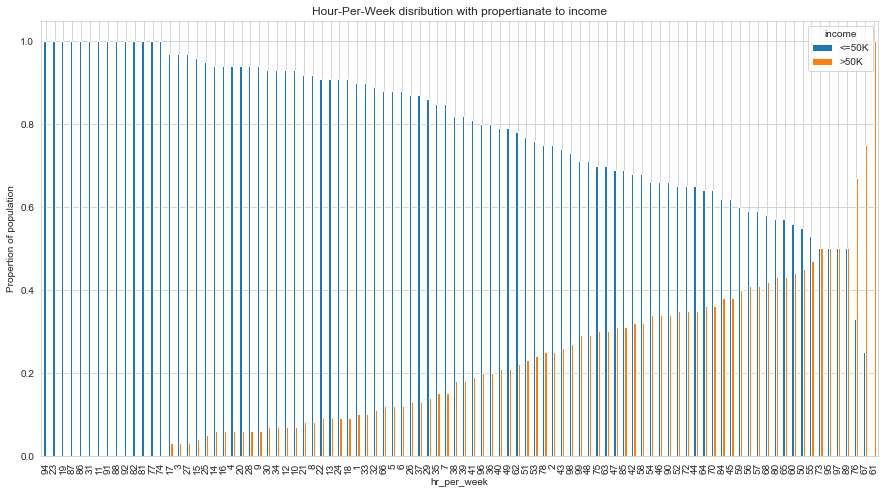

In [35]:
hr_per_week=round(pd.crosstab(df_extracol.hr_per_week,df_extracol.income).div(
    pd.crosstab(df_extracol.hr_per_week,df_extracol.income).apply(sum,1),0),2)
hr_per_week.sort_values(by='>50K',inplace=True)
ax=hr_per_week.plot(kind='bar',title='Hour-Per-Week disribution with propertianate to income',figsize=(15,8))
ax.set_xlabel('hr_per_week')
ax.set_ylabel('Propertion of population')

In [36]:
#Hour-Per-week with bin

df_extracol['hour_work_bin']=['<40' if i<40 else '40-60' if i<=60 else '>60' for i in df_extracol['hr_per_week']]

Text(0, 0.5, 'Propertion of population')

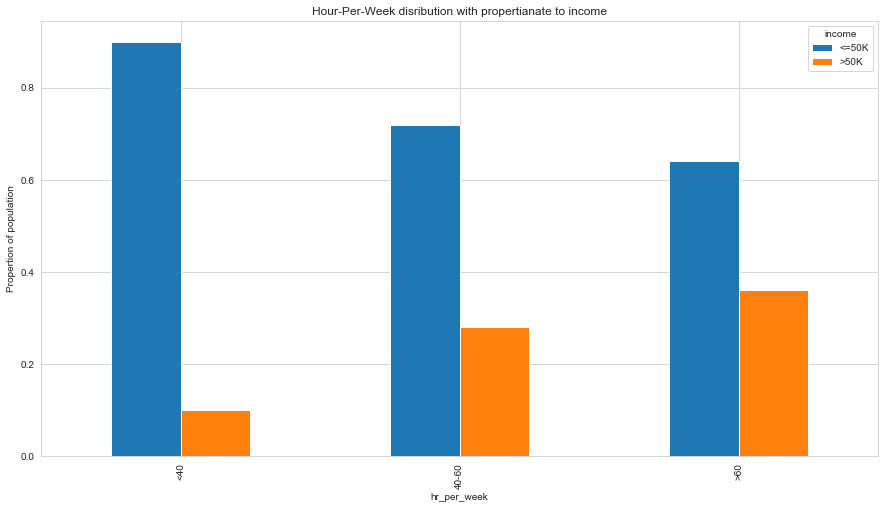

In [37]:
hrs_per_week=round(pd.crosstab(df_extracol.hour_work_bin,df_extracol.income).div(
    pd.crosstab(df_extracol.hour_work_bin,df_extracol.income).apply(sum,1),0),2)
hrs_per_week.sort_values(by='>50K',inplace=True)
ax=hrs_per_week.plot(kind='bar',title='Hour-Per-Week disribution with propertianate to income',figsize=(15,8))
ax.set_xlabel('hr_per_week')
ax.set_ylabel('Propertion of population')

Seems to intresting as there is increasing trend between the hour-per-week and the propertionate income wo earn more than 50k.

### Country vs Income

Text(0, 0.5, 'Propertion of population')

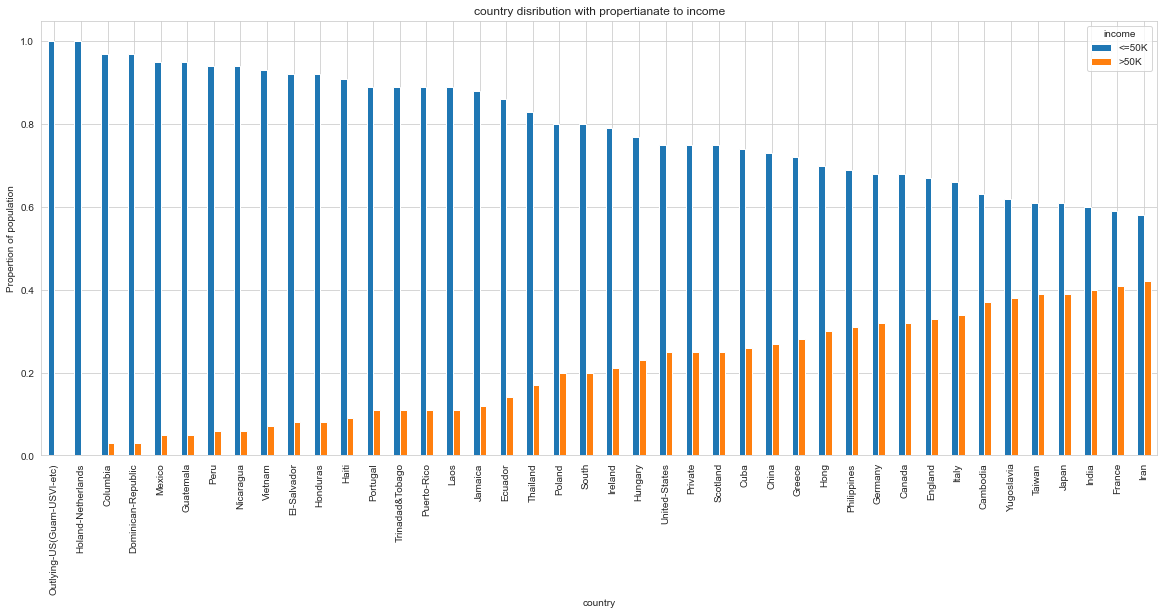

In [38]:
country=round(pd.crosstab(df_extracol.country,df_extracol.income).div(
    pd.crosstab(df_extracol.country,df_extracol.income).apply(sum,1),0),2)
country.sort_values(by='>50K',inplace=True)
ax=country.plot(kind='bar',title='country disribution with propertianate to income',figsize=(20,8))
ax.set_xlabel('country')
ax.set_ylabel('Propertion of population')

### Income 

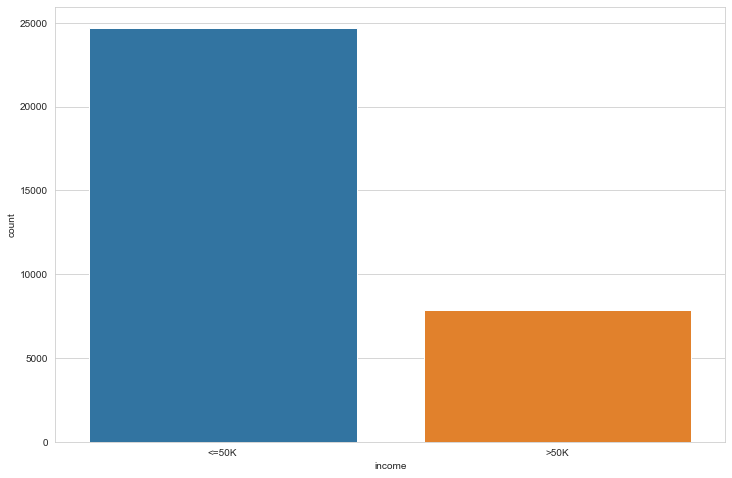

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(df_extracol['income'])
plt.show()

Here we start with coorelation matrix for continous column.

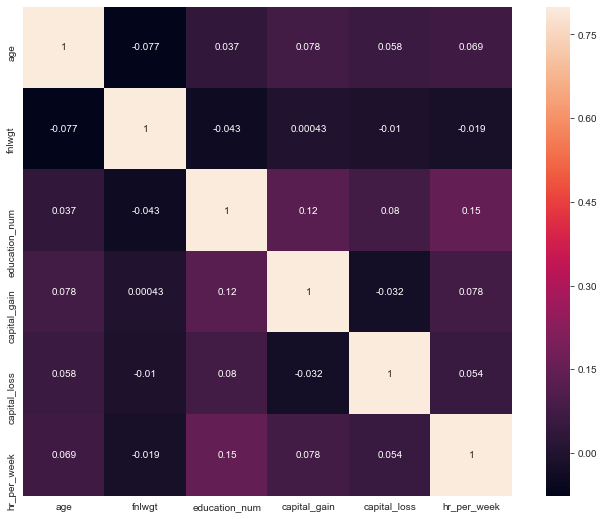

In [40]:
 cormat=df_extracol.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cormat, vmax=.8,annot = True,square=True);

## Data Transformation

### Feature Engineering 

In [41]:
#Created Married Column -Binary Yes(1) or No(0)
df_extracol['marital']=df_extracol['marital'].replace(['Never-married','Divorced','Separated','Widowed'],'Single')
df_extracol['marital']=df_extracol['marital'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')

#Convert income '<=50k' to 0 and  '>=50k' to 1
df_extracol['income']=df_extracol['income'].map({'<=50K':0,'>50K':1})

#Convert hour_work_bin into ordinal encoding
df_extracol['hour_work_bin']=df_extracol['hour_work_bin'].map({'<40':0,'40-60':1,'>60':2}).astype(str)

df_extracol['type_employer.missing']=df_extracol['type_employer.missing'].astype(str)

df_extracol['occupation.missing']=df_extracol['occupation.missing'].astype(str)



* Here we transform marital column into two catagory 'Single' for all who are 'Never-married','Divorced','Separated','Widowed'
  and 'Marital' for 'Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'.<br>
* Transforming target attribut into 0 or 1. 0 :'<50k' and 1:'>50k'<br>
* Performing ordinal encoding for hour_work_bin.

### Feature Selection

In [42]:
df_extracol.drop(['education','fnlwgt','country','hr_per_week'],axis=1,inplace=True)

* For education, we have two feature that convey the same meaning,education and education_num. To avoid the effect of this attribute on the models to be overstated, I am not going to use the categorical education attribute.

* fnlwght is to be used by the census,as it has inverse relationship with the income.Therefore, I choose to drop it also.

* I use to go with 'hour_work_bin' catgorical column and drop 'hr_per_week'.

In [43]:
len(df_extracol['income']==1)

32561

In [44]:
df_extracol['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

## Model Building 

### Data Preparation

In [45]:
def one_hot_encoding(df,cols):
    dataframe1=df.drop(columns=cols,axis=1)
    dataframe2=pd.get_dummies(df[cols],drop_first=True)
    
    return (pd.concat([dataframe1,dataframe2],axis=1,join='inner'))

In [46]:
X=df_extracol.drop(['income'],axis=1)
Y=df_extracol['income']

In [47]:
X.head()

,age,type_employer,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,type_employer.missing,occupation.missing,hour_work_bin
0,39,State-gov,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,0.0,0.0,1
1,50,Self-emp-not-inc,13,Married,Exec-managerial,Husband,White,Male,0,0,0.0,0.0,0
2,38,Private,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,0.0,0.0,1
3,53,Private,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,0.0,0.0,1
4,28,Private,13,Married,Prof-specialty,Wife,Black,Female,0,0,0.0,0.0,1


In [48]:
X=one_hot_encoding(X,X.columns)
X

,age,education_num,capital_gain,capital_loss,type_employer_Local-gov,type_employer_Never-worked,type_employer_Private,type_employer_Self-emp-inc,type_employer_Self-emp-not-inc,type_employer_State-gov,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,type_employer.missing_1.0,occupation.missing_1.0,hour_work_bin_1,hour_work_bin_2
0,39,13,2174,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,38,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,53,7,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,28,13,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
32557,40,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
32558,58,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32559,22,9,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


### Feature Scaling

In [49]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns =X.columns)

In [50]:
X.head()

,age,education_num,capital_gain,capital_loss,type_employer_Local-gov,type_employer_Never-worked,type_employer_Private,type_employer_Self-emp-inc,type_employer_Self-emp-not-inc,type_employer_State-gov,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,type_employer.missing_1.0,occupation.missing_1.0,hour_work_bin_1,hour_work_bin_2
0,0.030671,1.134739,0.148453,-0.21666,-0.262097,-0.014664,-1.747977,-0.188389,-0.290936,4.907700,...,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,-0.24445,-0.244944,0.612028,-0.187864
1,0.837109,1.134739,-0.145920,-0.21666,-0.262097,-0.014664,-1.747977,-0.188389,3.437186,-0.203761,...,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,-0.24445,-0.244944,-1.633913,-0.187864
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.262097,-0.014664,0.572090,-0.188389,-0.290936,-0.203761,...,-0.224927,-0.181552,-0.325768,-0.091612,0.413020,0.703071,-0.24445,-0.244944,0.612028,-0.187864
3,1.057047,-1.197459,-0.145920,-0.21666,-0.262097,-0.014664,0.572090,-0.188389,-0.290936,-0.203761,...,-0.224927,-0.181552,3.069667,-0.091612,-2.421192,0.703071,-0.24445,-0.244944,0.612028,-0.187864
4,-0.775768,1.134739,-0.145920,-0.21666,-0.262097,-0.014664,0.572090,-0.188389,-0.290936,-0.203761,...,4.445891,-0.181552,3.069667,-0.091612,-2.421192,-1.422331,-0.24445,-0.244944,0.612028,-0.187864


In [52]:
X.to_csv("Independent.csv")
Y.to_csv("Dependent.csv")

### Train - Test Split

In [53]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [54]:
Y_train.value_counts()

0    19775
1     6273
Name: income, dtype: int64

In [55]:
Y_test.value_counts()

0    4945
1    1568
Name: income, dtype: int64

## Model Building

In [56]:
def model_eval(actual,pred):
    confusion=pd.crosstab(actual,pred,rownames=['Actual'],colnames=['Predicted'])
    TP=confusion.loc[1,1]
    TN=confusion.loc[0,0]
    FP=confusion.loc[0,1]
    FN=confusion.loc[1,0]
    
    accuracy=((TP+TN)/(TP+TN+FP+FN))
    recall=(TP)/(TP+FN)
    precision=(TP)/(TP+FP)
    F1_score=(2*precision*recall)/(precision+recall)
    sensitivity = TP / (TP + FN) # Also called True Positive Rate
    specificity = TN / (TN + FP) # Also called False Positive Rate
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = F1_score
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

In [57]:
clf_object_list=[]
test_pred_list=[]
class_label=[]

### Logistic Regression

In [59]:
logreg=LogisticRegression(class_weight='balanced',solver='lbfgs',penalty='l2')
clf_object_list.append(logreg)
class_label.append('Logistic Regression')
logreg.fit(X_train,Y_train)
log_reg_pred=logreg.predict(X_test)
logistic_reg=model_eval(Y_test,log_reg_pred)

print('Logistic Regression Accuracy:',round(logistic_reg['accuracy']*100,3))

ovl_logreg=round(pd.DataFrame([logistic_reg],index=['logistic_reg']),4)
display(ovl_logreg)

Logistic Regression Accuracy: 80.24


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
logistic_reg,0.8024,0.5602,0.8335,0.6701,0.8335,0.7925,0.1976


### Support Vector Machine

In [60]:
## rbf kernal
svc_clf_rbf=SVC(kernel='rbf',C=5,tol=1e-3,gamma=0.01,probability=True)
clf_object_list.append(svc_clf_rbf)
class_label.append('SVC with rbf kernal')

svc_clf_rbf.fit(X_train,Y_train)
svc_clf_pred=svc_clf_rbf.predict(X_test)
svc_rbf=model_eval(Y_test,svc_clf_pred)

print("Support vector classifier kernal:'rbf' Accuracy:",round(svc_rbf['accuracy']*100,3))

ovl_svc_rbf=round(pd.DataFrame([svc_rbf],index=['svc_rbf']),4)
display(ovl_svc_rbf)

## Linear kernal
svc_clf_lin=SVC(kernel='linear',class_weight='balanced',probability=True)
clf_object_list.append(svc_clf_lin)
class_label.append('SVC with Linear Kernal')

svc_clf_lin.fit(X_train,Y_train)
svc_lin_pred=svc_clf_lin.predict(X_test)
svc_lin=model_eval(Y_test,svc_lin_pred)

print("Support vector classifier kernal:'linear' Accuracy:",round(svc_lin['accuracy']*100,3))

ovl_svc_lin=round(pd.DataFrame([svc_lin],index=['svc_lin']),4)
display(ovl_svc_lin)

## polynomial kernal
svc_clf_poly=SVC(kernel='poly',class_weight='balanced',probability=True)
clf_object_list.append(svc_clf_poly)
class_label.append('SVC with Poly Kernal')

svc_clf_poly.fit(X_train,Y_train)
svc_poly_pred=svc_clf_poly.predict(X_test)
svc_poly=model_eval(Y_test,svc_poly_pred)

print("Support vector classifier kernal:'poly' Accuracy:",round(svc_poly['accuracy']*100,3))

ovl_svc_poly=round(pd.DataFrame([svc_poly],index=['svc_poly']),4)
display(ovl_svc_poly)


Support vector classifier kernal:'rbf' Accuracy: 84.861


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
svc_rbf,0.8486,0.7295,0.5899,0.6523,0.5899,0.9306,0.1514


Support vector classifier kernal:'linear' Accuracy: 78.443


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
svc_lin,0.7844,0.5336,0.8304,0.6497,0.8304,0.7699,0.2156


Support vector classifier kernal:'poly' Accuracy: 78.412


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
svc_poly,0.7841,0.5331,0.8329,0.6501,0.8329,0.7687,0.2159


### Decision Tree Classifier

* Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)<br>
* Min samples required to split: 5% (Best amongst 5%,10%, 15% and 20%.)<br>
* Max Depth:8(Best amongst 4, 5, 6, 7, 8, 9, 10)<br>
* Min samples required at leaf: 1% (Best amongst 1%, 5% and 10%)


In [62]:
#create a classifier object

DT_clf=DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.01, min_samples_split=0.05,criterion='gini')
clf_object_list.append(DT_clf)
class_label.append('Decision Tree Classifier')

DT_clf.fit(X_train,Y_train)
DT_clf_pred=DT_clf.predict(X_test)
DTC=model_eval(Y_test,DT_clf_pred)

print('Decision Tree Classifier Accuracy:',round(DTC['accuracy']*100,3))

ovl_DTC_clf=round(pd.DataFrame([DTC],index=['DTC']),4)
display(ovl_DTC_clf)


Decision Tree Classifier Accuracy: 83.617


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
DTC,0.8362,0.73,0.507,0.5984,0.507,0.9405,0.1638


### Random Forest Classifier

* 'n_estimators': 150 Best of [50, 100, 120, 150, 200] <br>
* 'max_depth': 9 Best of [6, 7, 8, 9, 10, 15]<br>
* 'bootstrap': True <br>
* 'min_samples_split': 10% Best of [0.05, 0.01, 0.10]  <br>
* 'min_samples_leaf': 5% Best of [0.05, 0.08, 0.10, 0.15]   

In [63]:
RF_clf=RandomForestClassifier(n_estimators= 150,max_depth= 9,bootstrap= False)
clf_object_list.append(RF_clf)
class_label.append('Randome Forest Classifier')

RF_clf.fit(X_train,Y_train)
Rf_clf_pred=RF_clf.predict(X_test)
Random_Forest_Classifier=model_eval(Y_test,Rf_clf_pred)

print('Random Forest Classifier Accuracy:',round(Random_Forest_Classifier['accuracy']*100,3))

ovl_RandomF_clf=round(pd.DataFrame([Random_Forest_Classifier],index=['Random_Forest_Classifier']),4)
display(ovl_RandomF_clf)


Random Forest Classifier Accuracy: 85.245


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
Random_Forest_Classifier,0.8524,0.8014,0.5147,0.6268,0.5147,0.9596,0.1476


### Ada Boost 

In [64]:
ada=AdaBoostClassifier(n_estimators=150)
clf_object_list.append(ada)
class_label.append('AdaBoost Classifier')

ada.fit(X_train,Y_train)
ada_pred=ada.predict(X_test)
AdaBoost=model_eval(Y_test,ada_pred)

print('Adaboost : %.2f percent.' % (round(AdaBoost['accuracy']*100,2)))

#printmd('### 3.4.2.2. Model Evaulation ')
ovl_ada = round(pd.DataFrame([AdaBoost], index = ['AdaBoost']),4)
display(ovl_ada)

Adaboost : 86.53 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
AdaBoost,0.8653,0.7825,0.6103,0.6858,0.6103,0.9462,0.1347


## Model Evaluation

In [65]:
overall_eval=pd.concat([ovl_logreg,ovl_svc_rbf,ovl_svc_lin,ovl_svc_poly,ovl_DTC_clf,ovl_RandomF_clf,ovl_ada],axis=0)
overall_eval.sort_values(by=['f_measure','accuracy'],ascending=False,inplace=True)
display(overall_eval)

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
AdaBoost,0.8653,0.7825,0.6103,0.6858,0.6103,0.9462,0.1347
logistic_reg,0.8024,0.5602,0.8335,0.6701,0.8335,0.7925,0.1976
svc_rbf,0.8486,0.7295,0.5899,0.6523,0.5899,0.9306,0.1514
svc_poly,0.7841,0.5331,0.8329,0.6501,0.8329,0.7687,0.2159
svc_lin,0.7844,0.5336,0.8304,0.6497,0.8304,0.7699,0.2156
Random_Forest_Classifier,0.8524,0.8014,0.5147,0.6268,0.5147,0.9596,0.1476
DTC,0.8362,0.7300,0.5070,0.5984,0.5070,0.9405,0.1638


## ROC Curve

In [68]:
clf_object_list

[LogisticRegression(class_weight='balanced'),
 LogisticRegression(class_weight='balanced'),
 SVC(C=5, gamma=0.01, probability=True),
 SVC(class_weight='balanced', kernel='linear', probability=True),
 SVC(class_weight='balanced', kernel='poly', probability=True),
 DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.01,
                        min_samples_split=0.05),
 DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.01,
                        min_samples_split=0.05),
 RandomForestClassifier(bootstrap=False, max_depth=9, n_estimators=150),
 AdaBoostClassifier(n_estimators=150)]

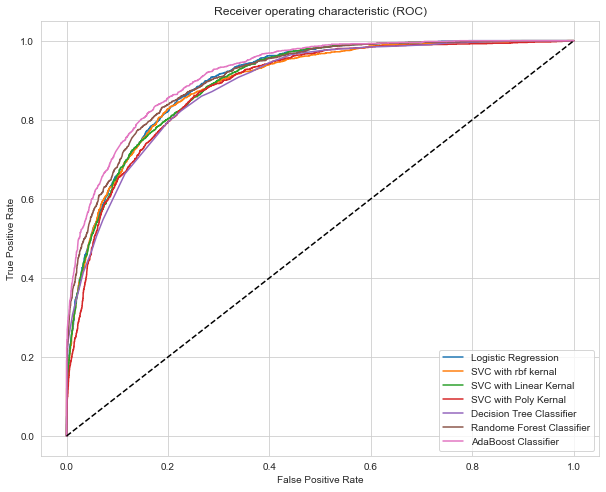

In [71]:
clf_o=[
        logreg,
        svc_clf_rbf,
        svc_clf_lin,
        svc_clf_poly,
        DT_clf,
        RF_clf,
        ada
      ]
plt.figure(figsize=(10,8))
for i in range(len(clf_o)):
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    y_score = clf_o[i].predict_proba(X_test)
    fpr, tpr, thres = roc_curve(Y_test.ravel(),y_score[:,1])                     
    plt.plot(fpr, tpr,color=color[i % len(color)])

plt.plot([0,1],[0,1],linestyle='--',color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(class_label,loc='lower right')
plt.show()


In [93]:
li=[]
for i in range(len(clf_o)):
    li.append(roc_auc_score(Y_test,clf_o[i].predict_proba(X_test)[:,1]))

In [105]:
ROC_Score=pd.concat([pd.Series(class_label),pd.Series(li)],axis=1,keys=['Model','Roc Score Against CLass >50k'])
ROC_Score.sort_values(by=['Roc Score Against CLass >50k'],ascending=False,inplace=True)
ROC_Score

,Model,Roc Score Against CLass >50k
6,AdaBoost Classifier,0.917235
5,Randome Forest Classifier,0.906124
0,Logistic Regression,0.899403
2,SVC with Linear Kernal,0.895142
1,SVC with rbf kernal,0.891914
4,Decision Tree Classifier,0.885002
3,SVC with Poly Kernal,0.884084


## Conclusion

I choose Adaboost model as my preferred my approach. The Adaboost model not only has the highest accuracy, but also has the highest precision and F-measure of all the models developed as a part of this analysis. The advantages of using Adaboost over other models is that they are very simple to implement. Since they are made up of weak individual learners, they are less susceptible to overfitting. However, Adaboost is sensitive to noisy data and outliers